<a href="https://colab.research.google.com/github/jcmachicao/uc_curso_modelamientopredictivo/blob/master/modpred__04B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**4B**
#### Cuaderno 4B
# **Curso Modelamiento Predictivo**
---
### **Evaluación de Modelos**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests

### Experimentos con muchos modelos y su evaluación

In [42]:
url = 'https://github.com/jcmachicao/uc_curso_modelamientopredictivo/blob/master/titanic.csv'
data = pd.read_csv('titanic.csv')
#data.info()

In [41]:
data.to_pickle('drive/My Drive/2020 Cursos/2020 Modelamiento Predictivo/titanic.pkl')

In [ ]:
data = data.dropna()
data.info()

In [44]:
data.Embarked.unique()

array(['C', 'S', 'Q'], dtype=object)

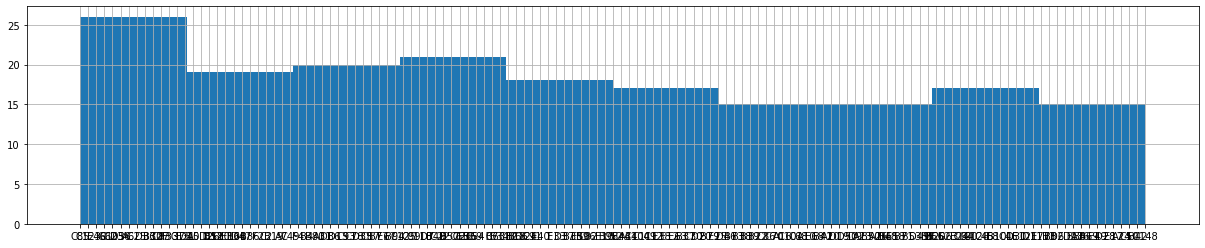

In [40]:
data.Cabin.hist(figsize=(21,4))

In [45]:
factores = []
for col in data.columns:
  if col in ['Sex', 'Embarked', 'Cabin']:
    factor = pd.factorize(data[col])
    data[col + '_num'] = factor[0]
    factores.append([col, factor[1]])
factores

[['Sex', Index(['female', 'male'], dtype='object')],
 ['Cabin',
  Index(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'D33',
         'B30',
         ...
         'D17', 'A36', 'B69', 'E49', 'D28', 'E17', 'A24', 'C50', 'B42', 'C148'],
        dtype='object', length=133)],
 ['Embarked', Index(['C', 'S', 'Q'], dtype='object')]]

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   183 non-null    int64  
 1   Survived      183 non-null    int64  
 2   Pclass        183 non-null    int64  
 3   Name          183 non-null    object 
 4   Sex           183 non-null    object 
 5   Age           183 non-null    float64
 6   SibSp         183 non-null    int64  
 7   Parch         183 non-null    int64  
 8   Ticket        183 non-null    object 
 9   Fare          183 non-null    float64
 10  Cabin         183 non-null    object 
 11  Embarked      183 non-null    object 
 12  Sex_num       183 non-null    int64  
 13  Cabin_num     183 non-null    int64  
 14  Embarked_num  183 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 22.9+ KB


In [74]:
data100 = data.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked', 'Cabin'], axis=1)
data100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      183 non-null    int64  
 1   Pclass        183 non-null    int64  
 2   Age           183 non-null    float64
 3   SibSp         183 non-null    int64  
 4   Parch         183 non-null    int64  
 5   Fare          183 non-null    float64
 6   Sex_num       183 non-null    int64  
 7   Cabin_num     183 non-null    int64  
 8   Embarked_num  183 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 14.3 KB


In [8]:
# Herramientas de evaluación
from sklearn.model_selection import train_test_split, cross_val_score

In [80]:
X_tr, X_ts, y_tr, y_ts = train_test_split(np.array(data100.drop(['Survived'], axis=1)), 
                                          np.array(data100.Survived),
                                          test_size=0.3)

In [81]:
X_tr.shape, y_tr.shape, X_ts.shape, y_ts.shape

((128, 8), (128,), (55, 8), (55,))

In [82]:
# Modelos a utilizar
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 

In [83]:
mod_arbol = DecisionTreeClassifier()
mod_forest = RandomForestClassifier()
mod_logreg = LogisticRegression()
mod_bayes = GaussianNB()

In [87]:
modelos = [mod_arbol, mod_forest, mod_logreg, mod_bayes]

In [84]:
y_p1 = mod_arbol.fit(X_tr, y_tr).predict(X_ts)
y_p2 = mod_forest.fit(X_tr, y_tr).predict(X_ts)
y_p3 = mod_logreg.fit(X_tr, y_tr).predict(X_ts)
y_p4 = mod_bayes.fit(X_tr, y_tr).predict(X_ts)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [88]:
for mod in modelos:
  print(mod.score(X_ts, y_ts))

0.6727272727272727
0.7090909090909091
0.7272727272727273
0.6727272727272727


In [93]:
X = np.array(data100.drop(['Survived'], axis=1))
y = np.array(data100.Survived)
X.shape, y.shape

((183, 8), (183,))

In [ ]:
puntajes = []
for mod in modelos:
  scores = cross_val_score(mod, X, y, cv=8)
  puntajes.append(scores)
puntajes

In [105]:
mod_names = ['Arbol', 'RForest', 'LogReg', 'NBayes']

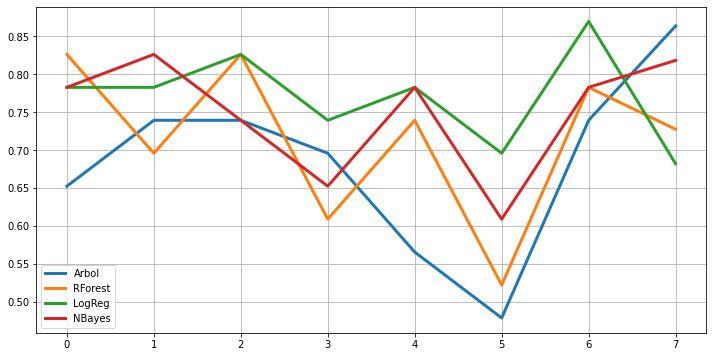

In [107]:
plt.figure(figsize=(12,6), facecolor='white')
for k, punt in enumerate(puntajes):
  plt.plot(punt, lw=3, label=mod_names[k])
plt.legend()
plt.grid(True)
plt.show()

In [108]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

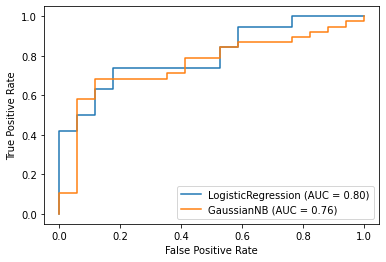

In [114]:
# Uso de Matriz de Confusion y Curva ROC
ax1 = plot_roc_curve(mod_logreg, X_ts, y_ts)
ax2 = plot_roc_curve(mod_bayes, X_ts, y_ts, ax=ax1.ax_)
plt.show()

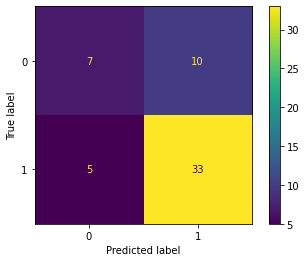

In [115]:
ax1 = plot_confusion_matrix(mod_logreg, X_ts, y_ts)
plt.show()

### Clases en sklearn
https://scikit-learn.org/stable/modules/classes.html

https://scikit-learn.org/stable/modules/cross_validation.html